# Altura y peso de árboles

Para estudiar la relacion entre la edad y el peso de una especie de arboles se pesan distintos ejemplares de distintas edades medidas en años, obteniendose los valores que figuran en el archivo pesoArboles.csv.

       t          y
0    3.0  14.432164
1    3.5  17.908407
2    4.0  21.589654
3    4.5  25.460048
4    5.0  29.506636
5    5.5  33.718594
6    6.0  38.086709
7    6.5  42.603021
8    7.0  47.260569
9    7.5  52.053204
10   8.0  56.975438
11   8.5  62.022346
12   9.0  67.189469
13   9.5  72.472750
14  10.0  77.868479
15  10.5  83.373246
16  11.0  88.983903


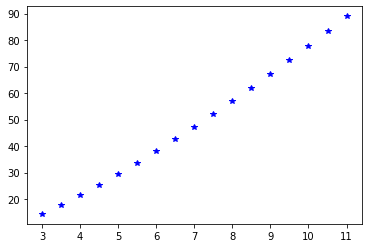

In [1]:
import numpy as np
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as shc
datos = pd.read_csv("pesoArboles.csv")
datosNP = datos.to_numpy()
print(datos)
t = datosNP[:,0]
y = datosNP[:,1]
plt.plot(t,y,"b*")

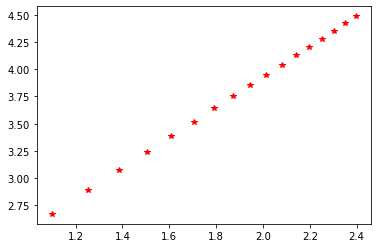

In [2]:
z = np.log(y)
x = np.log(t)
plt.plot(x,z,'r*')

In [3]:
# Ajuste sin pesos (ordinario)
unos = np.ones(len(t))
At = np.array([unos, x])
A = np.transpose(At)
print(A)
# Ecuaciones Normales
AtA = np.dot(At, A)
Atz = np.dot(At, z)
print(AtA,Atz)
v = np.linalg.solve(AtA, Atz)
alfa=v[0]
beta=v[1]
print("alfa",v[0],"beta=",v[1]) # alfa* , beta*

[[1.         1.09861229]
 [1.         1.25276297]
 [1.         1.38629436]
 [1.         1.5040774 ]
 [1.         1.60943791]
 [1.         1.70474809]
 [1.         1.79175947]
 [1.         1.87180218]
 [1.         1.94591015]
 [1.         2.01490302]
 [1.         2.07944154]
 [1.         2.14006616]
 [1.         2.19722458]
 [1.         2.2512918 ]
 [1.         2.30258509]
 [1.         2.35137526]
 [1.         2.39789527]]
[[17.         31.90018754]
 [31.90018754 62.39816358]] [ 63.89409845 123.44936855]
alfa 1.1314021116321027 beta= 1.3999999999470865


Recta de regresión lineal  
1.4 x + 1.131


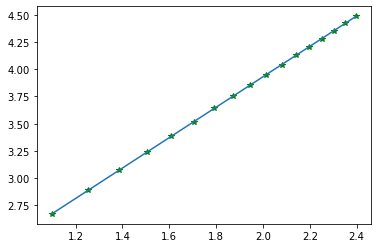

In [4]:
v = np.flipud(v)  #da "vuelta" el vector del elemento  n al 0
p = np.poly1d(v)  # debemos pasar los coef. desde el de mayor grado al menor
print("Recta de regresión lineal",p)
plt.plot(x,z,'*g')
zRL = np.polyval(p,x)
plt.plot(x,zRL)

a= 3.1000000004371064 b= 1.3999999999470865


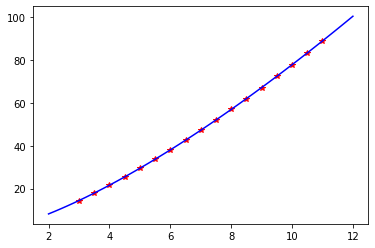

In [5]:
b=beta
a=np.exp(alfa)
print('a=',a,'b=',b)
yRL=a*t**b
t_graf=np.linspace(2,12,50)
y_graf=a*t_graf**b
plt.plot(t,y,'r*')
plt.plot(t_graf,y_graf,'b')

In [7]:
#Ajusto pero ahora con CMGeneralizados
pesos=y**2  # z=h(y)=ln (y) entonces   w=(1/h'(y))^2=(1/(1/y))^2=y^2
print(pesos)
W=np.diag(pesos)
AtWA = At@W@A
AtWz = At@W@z
print(AtWA,AtWz)
v_G = np.linalg.solve(AtWA, AtWz)
alfa_G=v_G[0]
beta_G=v_G[1]
print("alfa con pesos",v_G[0],"beta con pesos=",v_G[1])

[ 208.2873531   320.71104128  466.11315854  648.2140294   870.64157099
 1136.94359213 1450.59738036 1815.01737276 2233.56142096 2709.53599774
 3246.20058201 3846.77141079 4514.42470688 5252.29949691 6063.50008095
 6951.09821861 7918.13507498]
[[ 49652.05248838 107412.93651489]
 [107412.93651489 235328.80973817]] [206554.54814738 450987.55681051]
alfa con pesos 1.1314021116515247 beta con pesos= 1.3999999999381236


Recta de regresión lineal con pesos  
1.4 x + 1.131


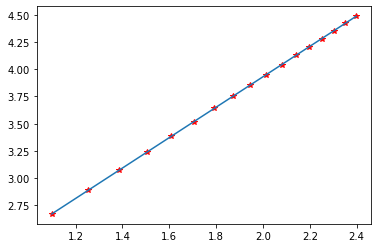

In [8]:
v_G = np.flipud(v_G) #da "vuelta" el vector del elemento  n al 0
p_G = np.poly1d(v_G)  # debemos pasar los coef. desde el de mayor grado al menor
print("Recta de regresión lineal con pesos",p_G)
plt.plot(x,z,'*r')
zRL_G = np.polyval(p_G,x)
plt.plot(x,zRL_G)

a_G= 3.1000000004973147 b_G= 1.3999999999381236


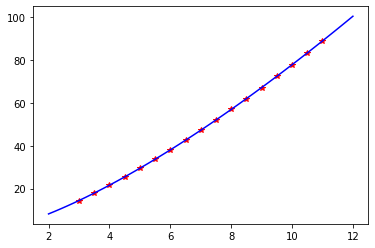

In [9]:
b_G=beta_G
a_G=np.exp(alfa_G)
print('a_G=',a_G,'b_G=',b_G)
yRL=a_G*t**b_G
t_graf=np.linspace(2,12,50)
y_graf=a_G*t_graf**b_G
plt.plot(t,y,'r*')
plt.plot(t_graf,y_graf,'b')

a= 3.1000000004371064 b= 1.3999999999470865
a_G= 3.1000000004973147 b_G= 1.3999999999381236


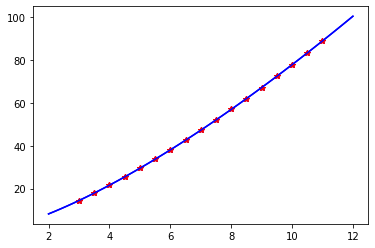

In [10]:
# En un mismo gráfico, grafico los datos y los ajustes:
#DATOS:
plt.plot(t,y,"b*")

#CM:
b=beta
a=np.exp(alfa)
print('a=',a,'b=',b)
yRL=a*t**b
t_graf=np.linspace(2,12,50)
y_graf=a*t_graf**b
plt.plot(t,y,'r*')
plt.plot(t_graf,y_graf,'b')

#CMG:
b_G=beta_G
a_G=np.exp(alfa_G)
print('a_G=',a_G,'b_G=',b_G)
yRL=a_G*t**b_G
t_graf=np.linspace(2,12,50)
y_graf=a_G*t_graf**b_G
plt.plot(t,y,'r*')
plt.plot(t_graf,y_graf,'b')

In [11]:
#Calculo norma 2 de los vectores y concluyo con cual se obtuvo menor error:
Error_CM = (y**2 - (a*t**b)**2)
print("El error por CM fue",sum(Error_CM))
Error_CMG = (y**2 - (a_G*t**b_G)**2)
print("El error por CMG fue",sum(Error_CMG)) #Se obtiene una norma más chica con CMG.

El error por CM fue 3.1225511065713363e-09
El error por CMG fue -1.169837560155429e-10
